_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de), Moritz Becker (moritz.becker@phys.uni-goettingen.de), Florian Habenstein (florian.habenstein@mpibpc.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 06 - Wirtschaftswissenschaften: Histogramme und Zeitreihen
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
In diesem Tutorium wollen wir uns den Zeitlichen verlauf verschiedener Größen (Streiks, Streiktage und streikende Arbeiter) für verschiedene Länder ansehen. Außerdem berechnen wir ein paar einfache Kenngrößen wie den Mittelwert der Streikanzahl für ein spezifisches Jahr und versuchen, Trends aus dem Datensatz mit politischen Entwicklungen oder historischen Ereignissen zu erklären.  

Das Tutorial gliedert sich in
* [Histogramme](#histogramme)
* [Zeitreihen](#zeitreihen)

<a name="daten_beschaffen"></a>1. Histogramme
---

In [69]:
# lade den Datensatz
import pandas as pd

# Dateiname 
fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'
# lade die Datei als pandas DataFrame
# WICHTIG: wir benutzen hier das "broad" Format, da damit
# Histogramme über Jahreszahlen einfacher zu erstellen sind,
# ohne das DataFrame zu filtern
streiks = pd.read_excel("daten/" + fname_streiks)
streiks.head()

,ccode,country name,1500,1501,1502,1503,1504,1505,1506,1507,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4.0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


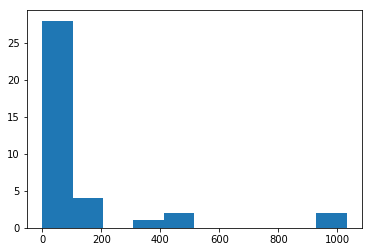

In [70]:
# 1.A
# importiere das Untermodul pyplot aus der Bibliothek
# matplotlib zum darstellen von Grafiken
import matplotlib.pyplot as plt
# mit diesem Kommando teilen wir dem Jupyter-Notebook mit,
# dass es Grafiken direkt im Notebook anzeigen soll
%matplotlib inline

# erstelle ein einfaches Histogram der Streiks im Jahr 2010
plt.hist(streiks['2010'].dropna());

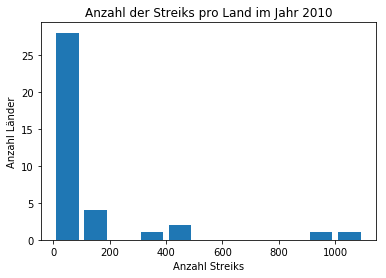

In [72]:
# 1.Ba
# die Werte liegen alle in einem Bereich von 0 bis 1100 Streiks
# indem wir die "range" entsprechend festlegen und die Anzahl der Bins
# auf 11 setzen, liegen die einzelnen Bins zwischen "glatten" Vielfachen
# von 100. Das ist anschaulich in einfach zu interpretieren. Diese 
# Darstellung lässt z.B. direkt ablesen, dass in den meisten Ländern zwischen
# 0 und 100 Streiks stattgefunden haben. Allerdings geht auch viel Information
# über den Bereich mit wenigen Streiks (0-100) verloren, da hier alle
# Länder in einen einzigen bin aggregiert werden

# die rwidth auf einen Wert kleiner 1.0 zu setzen ist auch eine gute Idee,
# da es die einzelen bins in der Darstellung besser voneinander abgrenzt.

# Histogram
plt.hist(streiks['2010'].dropna(), range=[0,1100], bins=11, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010');

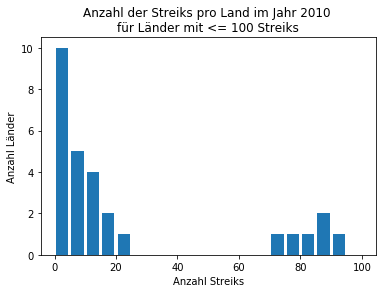

In [73]:
# 1.Bb
# um den Bereich zwischen 0 und 100 genauer zu betrachten, setzen wir die
# range entsprechend und schrauben die Anzahl der bins nach oben:

# Histogram
plt.hist(streiks['2010'].dropna(), range=[0,100], bins=20, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

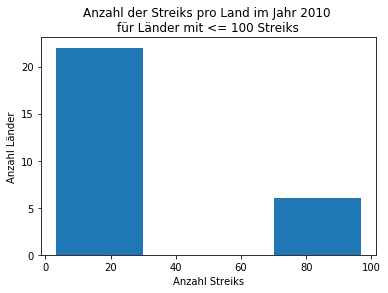

In [74]:
# 1.C wenige bins
# hier geht (wie schon oben beschrieben) viel Information verloren

# Histogram
plt.hist(streiks['2010'].dropna(), range=[0,100], bins=3, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

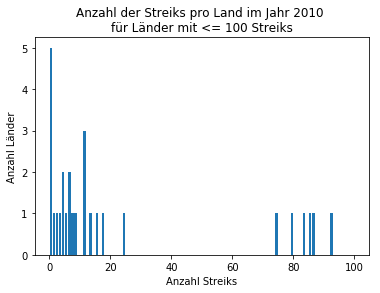

In [75]:
# 1.C viele bins
# hier geht der Vorteil der Aggregierten Information verloren und es
# ist schwierig, aus der Darstellung allgemeinere Erkenntnisse zu extrahieren

# Histogram
plt.hist(streiks['2010'].dropna(), range=[0,100], bins=100, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010 \nfür Länder mit <= 100 Streiks');

# ein guter Wert für den Bereich 0-100 Streiks ist (wie in 3.B) z.B. bins=20

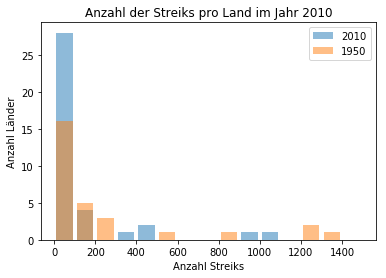

In [76]:
# 1.D
# im Jahr 1950 gab es einige Länder mit einer deutlich höheren Anzahl
# an Streiks. Entsprechend müssen wir die range des Histograms anpassen.

# Um die beiden plots zu vergleichen ist es hilfreich, range und bins
# jeweils gleich zu wählen.

# Um die Lesbarkeit der Visualisierung zu verbesern, setzen wir den
# alpha-wert (Durchsichtigkeit) der Balken auf 50% - da sonst die
# größeren Balken die dahinterliegenden Balken verdecken

# HINWEIS: mit dem Argument "label" weisen wir jedem der beiden
# Histogramme einen "Namen" zu, der später in der Legende aufscheint

# Histogramm der Streiks im Jahr 2010
plt.hist(streiks['2010'].dropna(), range=[0,1500], bins=15, rwidth=0.8, \
         alpha=0.5, label='2010')

# Histogram der Streiks im Jahr 1950
plt.hist(streiks['1950'].dropna(), range=[0,1500], bins=15, rwidth=0.8, \
         alpha=0.5, label='1950')

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Anzahl der Streiks pro Land im Jahr 2010')

# Legende
plt.legend();

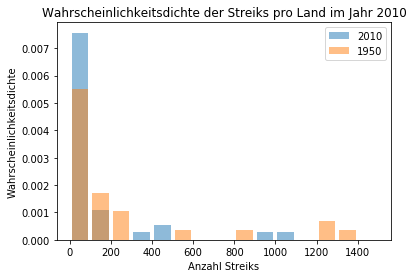

In [78]:
# 1.E (density)
# das Argument "density" verändert die Darstellung der Beobachtungen auf der y-Achse. 
# Vorher war die absolute Anzahl der Beobachtungen abgebildet, mit density=True
# wird die normierte Anzahl der beobachtungen abgebildet, die als Wahrscheinlichkeits-
# dichte interpretiert werden kann
plt.hist(streiks['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', density=True)
plt.hist(streiks['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', density=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Wahrscheinlichkeitsdichte der Streiks pro Land im Jahr 2010')
plt.legend()

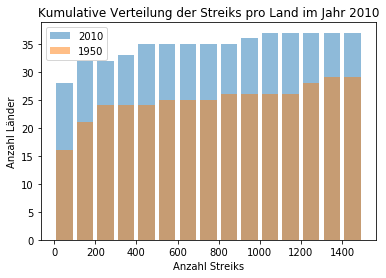

In [79]:
# 1.E (cumulative)
# wenn cumulative=True, dann zeigt jeder bin nicht nur die Anzahl der Beobachtungen
# in ebendiesem bin sondern die Anzahl in dem bin PLUS die Anzahl der Beobachtungen
# in allen Vorangegangenen bins. Die Anzahl der Beobachtungen im letzten Bin entspricht
# also immer der Gesamtanzahl der Beobachtungen.
plt.hist(streiks['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', cumulative=True)
plt.hist(streiks['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', cumulative=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Anzahl Länder')
plt.title('Kumulative Verteilung der Streiks pro Land im Jahr 2010')
plt.legend()

# wir können ablesen, dass im Jahr 1950 zwar mehr länder eine Höhere
# Anzahl an Streiks hatten, insgesamt aber aus weniger Ländern Streiks
# gemeldet wurden. Da wir oben schon gesehen haben, dass die Datenlage
# insbesondere um den zweiten Weltkrieg herum nicht besonders gut ist,
# stellt sich die Frage, ob dieses Ergebnis der Realität entspricht oder
# der schlechten Datenlage geschuldet ist.

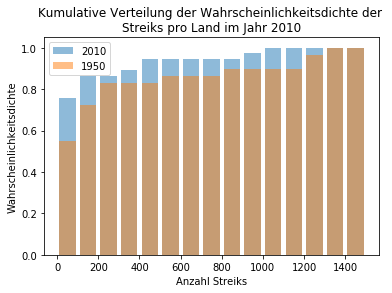

In [80]:
# 1.E (density & cumulative)
# ist sowohl density=True als auch cumulative=True, dann lässt sich schön beobachten,
# dass die Wahrscheinlichkeitsdichte auf 1 normiert ist, dass heißt die kumulierten 
# Wahrscheinlichkeiten, eine Beobachtung in einem Bin zu finden ist im letzten bin gleich 1
plt.hist(streiks['2010'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='2010', cumulative=True, density=True)
plt.hist(streiks['1950'].dropna(), range=[0,1500], bins=15,\
         rwidth=0.8, alpha=0.5, label='1950', cumulative=True, density=True)
plt.xlabel('Anzahl Streiks')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Kumulative Verteilung der Wahrscheinlichkeitsdichte der \nStreiks pro Land im Jahr 2010')
plt.legend()

[Anfang](#top)

<a name="tortendiagramm"></a>2. Zeitreihen
---
Für die nachfolgenden Aufgaben ist es praktischer, die Daten im sog. "long Format" vorliegen zu haben. Dankenswerterweise liegen alle drei Datensätze zu Streiks bereits im Fong format vor (siehe zweites Sheet in der Excel-Datei). Wir können ein spezifisches Sheet der Excel-Datei  einlesen, indem wir der Funktion ```read_excel()``` das Argument ```sheet_name``` mitgeben: 

In [81]:
# lade den Datensatz
import pandas as pd

# Dateiname 
fname_streiks = 'NumberofLabourDisputes_Broad.xlsx'

# lade die Datei als pandas DataFrame
streiks = pd.read_excel("daten/" + fname_streiks, sheet_name='Data Long Format')
streiks.head()

,ccode,country.name,year,value
0,32,Argentina,1927,56
1,36,Australia,1927,441
2,40,Austria,1927,216
3,56,Belgium,1927,186
4,100,Bulgaria,1927,23


**A.** Was ist der Unterschied zwischen dem long Format und dem in der letzen Übung benutzen Datenformat? Kannst du erklären, warum das long Format praktischer zu handhaben sein kann?  

* _Das long format hat nur eine Spalte pro Variable, was das Arbeiten mit den Datensätzen in vielen Faällen vereinfacht. Zudem stehen im long format meist nur Einträge, für die auch tatsächlich Beobachtungen vorhanden sind, deswegen müssen wir seltender mit NaNs arbeiten._

Als erstes wollen wir die Entwicklung der Streik-Anzahl über die Zeit untersuchen. Um das für ein spezifisches Land zu tun, müssen wir das DataFrame entsprechend filtern:

In [82]:
land = 'United Kingdom'
filter_streiks_land = streiks['country.name'] == land
streiks_land = streiks[filter_streiks_land]
streiks_land.head()

,ccode,country.name,year,value
29,826,United Kingdom,1927,308
61,826,United Kingdom,1928,302
94,826,United Kingdom,1929,431
127,826,United Kingdom,1930,422
160,826,United Kingdom,1931,420


Den Verlauf über die Zeit können wir mit Hilfe einer Zeitreihe visualisieren. Dafür benutzen wir die Funktion ```plot(x,y)``` der Funktion ```matplotlib.pyplot```, der wir die Jahreszahl als x-Wert und die Anzahl der Streiks als y-Wert übergeben:

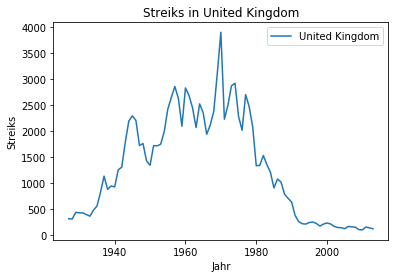

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(streiks_land['year'], streiks_land['value'], label=land)
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.title('Streiks in {}'.format(land))
plt.legend()

**B.** Visualisiere den zeitlichen Verlauf der Anzahl der Streiks für verschiedene Länder in der selben Abbildung. Stelle sicher, dass die Abbildung Achsenbeschriftungen, einen Titel und eine Legende hat.  

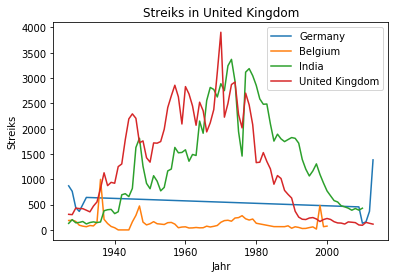

In [84]:
#B)
#Deutschland
filter_streiks_germany = streiks['country.name'] == "Germany"
streiks_germany = streiks[filter_streiks_germany]
#Belgien
filter_streiks_belgium = streiks['country.name'] == "Belgium"
streiks_belgium = streiks[filter_streiks_belgium]
#Österreich
filter_streiks_india = streiks['country.name'] == "India"
streiks_india = streiks[filter_streiks_india]
#Vereinigtes Königreich
filter_streiks_gb = streiks['country.name'] == "United Kingdom"
streiks_gb = streiks[filter_streiks_gb]

plt.plot(streiks_germany['year'], streiks_germany['value'], label="Germany")
plt.plot(streiks_belgium['year'], streiks_belgium['value'], label="Belgium")
plt.plot(streiks_india['year'], streiks_india['value'], label="India")
plt.plot(streiks_gb['year'], streiks_gb['value'], label="United Kingdom")
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.title('Streiks in {}'.format(land))
plt.legend()

**C.** Sieh dir insbesondere auch den zeitlichen Verlauf für Deutschland an. Was fällt dir auf? Wie lässt sich die Datenlage erklären? Was ließe sich unternehmen, um die fehlenden Daten zu ergänzen? 

In [85]:
streiks_germany

,ccode,country.name,year,value
11,276,Germany,1927,871
43,276,Germany,1928,763
75,276,Germany,1929,441
108,276,Germany,1930,366
141,276,Germany,1931,504
175,276,Germany,1932,642
4646,276,Germany,2009,455
4685,276,Germany,2010,132
4722,276,Germany,2011,158
4757,276,Germany,2012,368


Die Anzahl der Eintraege fuer Deutschland beträgt 11.


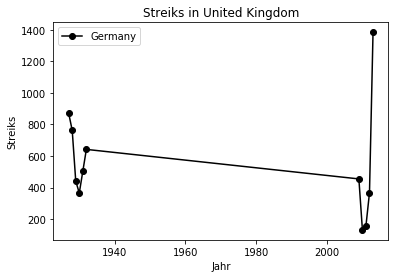

In [86]:
plt.plot(streiks_germany['year'], streiks_germany['value'], '-ko', label='Germany') #plotte den Streikverlauf fuer Deutschland
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.title('Streiks in {}'.format(land))
plt.legend()

eintraegeAnzahl=len(streiks_germany['value'])

print('Die Anzahl der Eintraege fuer Deutschland beträgt {}.'\
      .format(eintraegeAnzahl))


<ul>
    <li>Scheinbar wurden zwischen 1932 und 2009 keine Daten erhoben</li>
    <li>Moegliche Ursachen:</li>
    <ul>
    <li>Teilung Deutschlands bis 1990</li>
    <li>Zweiter Weltkrieg</li>
    </ul> 
    <li>Loesung</li>
    <ul>
    <li>Erhebung und Zusammenlegung der Daten aus Ost- und West-Deutschland.</li>
    </ul> 
</ul> 


**D.** Mit den Funktionen ```plt.xlim(xmin, xmax)``` und ```plt.ylim(ymin, ymax)``` lässt sich der in einer Abbildung dargestellte Bereich anpassen (ähnlich wie das ```range=[min, max]``` Argument in der Histogram-Funktion). Benutze diese Funktionen, um dir in der Darstellung aus Aufgabe **1.B** den Zeitraum um das Jahr 2000 genauer anzusehen.  

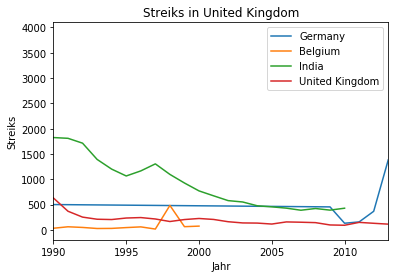

In [87]:
plt.plot(streiks_germany['year'], streiks_germany['value'], label="Germany")
plt.plot(streiks_belgium['year'], streiks_belgium['value'], label="Belgium")
plt.plot(streiks_india['year'], streiks_india['value'], label="India")
plt.plot(streiks_gb['year'], streiks_gb['value'], label="United Kingdom")
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.xlim(1990,2013)
plt.title('Streiks in {}'.format(land))
plt.legend()

**E. (optional)** Auch die Funktion ```plot()``` hat viele verschiedene Argumente, mit denen man ihr Verhalten modifizieren kann. Mache dich mit der Dokumentation der Funktion vertraut und probiere ein paar Argumente aus, um die Abbildung zu verändern. Versuche insbesondere, die Darstellung der Linie zu verändern: aktuell ist die Linie einfach nur eine Linie. Möglich sind aber auch Punkte oder Striche. Was eignet sich für unsere Daten am besten und warum?

Text(0.5,1,'Streiks in verschiedenen Ländern')

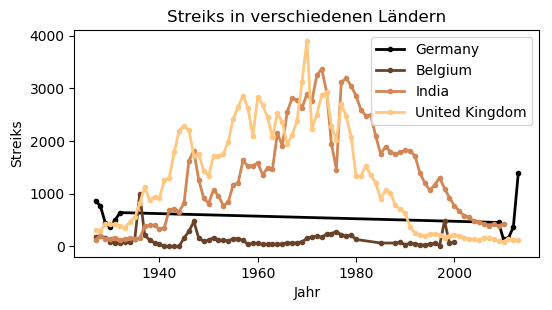

In [88]:
# NumPyist eine sehr nützliche Bibliothek fuer das Arbeiten mit
# Vektoren und Matrizen und vielem mehr.
import numpy as np 

# Liste der gefilterten DataFrames und Namen, damit wir einfach über alle
# ausgewählten Länder iterieren können
lands = [streiks_germany, streiks_belgium, streiks_india, streiks_gb]
land_names = ['Germany', 'Belgium', 'India', 'United Kingdom']

# Bisher hat python die Farbe den plots automatisch zugewiesen, wir koennen die
# Farbe jedoch auch verändern. Wenn ein einheitliches farbliches Thema erwünscht 
# ist, können wir ausserdem auf colormaps zurückgreifen 
# (https://matplotlib.org/tutorials/colors/colormaps.html)
# und anschliessend jedem Land einen Farbton aus dieser colormap zuweisen:
cmap=plt.get_cmap('copper') #Name der colormap
colors = [cmap(i) for i in np.linspace(0,1,4)]

# Es ist haeufig sinnvoll die Groesse und Aufloesung der Abbildung (in dpi) zu verändern,
# da die Beschriftungen standardmaessig eher zu klein ausfallen.
plt.figure(figsize=(6,3), dpi=100)
for land, land_name, color in zip(lands, land_names, colors):
    ## Über linestyle koennen verschiedene Linien-designs vorgegeben werden 
    # ('-', '--', '-.', ':', '',). Ausserdem laesst sich ueber Linewidth die 
    # Dicke vorgeben.
    # Manchmal ist es sinnvoll die einzelnen Datenpunkte ueber Marker zu markieren 
    # (siehe Beispiel Deutschland) um die die Datendichte besser einschaetzen zu koennen. 
    # Ueber "color=Color[land]" weisen wir die Farben aus unserem Color distionary 
    # von oben dem jeweiligen Linien-plot zu.
    plt.plot(land['year'], land['value'], linestyle='-', Linewidth=2, marker='o', \
             Markersize=3, color=color, label=land_name)
    plt.xlabel('Jahr')
    plt.ylabel('Streiks')
    plt.legend()
    
plt.title('Streiks in verschiedenen Ländern')

**F. (optional)** Lade auch die Tabellen für die Anzahl der in den Streiks involvierten Arbeiter und die Anzahl der durch Streiks verlorenen Arbeitstage. Visualisiere alle drei Größen in der selben Abbildung für die USA.  <font color='green'>**HINWEIS:** Du kannst mit ```plt.yscale('log')``` die y-Achse auf logarithmische Darstellung umstellen.</font> Was passiert bei der logarithmischen Darstellung? Warum ist das in diesem Fall hilfreich?  

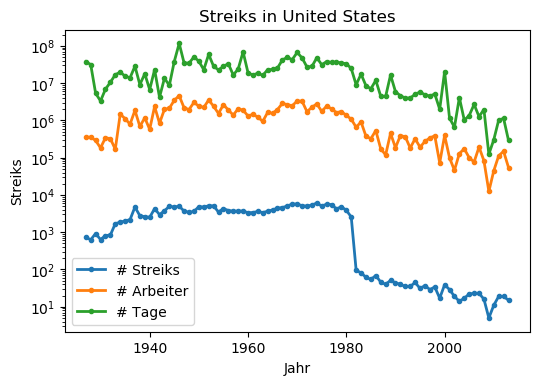

In [89]:
from os.path import join

# Dateiname 
fname_arbeiter = 'NumberofWorkersInvolvedinLabourDisputes_Broad.xlsx'
fname_tage = 'NumberofDaysLostinLabourDisputes_Broad.xlsx'

# lade die Datei als pandas DataFrame
arbeiter = pd.read_excel(join("daten/", fname_arbeiter), sheet_name='Data Long Format')
tage = pd.read_excel(join("daten/", fname_tage), sheet_name='Data Long Format')

land='United States'
Filter1 = streiks['country.name'] == land
Filter2 = arbeiter['country.name'] == land
Filter3 = tage['country.name'] == land

plt.figure(figsize=(6,4), dpi=100)
plt.plot(streiks[Filter1]['year'], streiks[Filter1]['value'], linestyle='-', Linewidth=2, marker='o', Markersize=3, label='# Streiks')
plt.plot(arbeiter[Filter2]['year'], arbeiter[Filter2]['value'], linestyle='-', Linewidth=2, marker='o', Markersize=3, label='# Arbeiter')
plt.plot(tage[Filter3]['year'], tage[Filter3]['value'], linestyle='-', Linewidth=2, marker='o', Markersize=3, label='# Tage')
plt.xlabel('Jahr')
plt.ylabel('Streiks')
plt.yscale('log') #Setze die y-achse auf logarithmisch
plt.title('Streiks in {}'.format(land))
plt.legend()

* _Wenn die Wertebereiche der zu analysierenden Variablen um mehrere Größenordungen voneinander abweichen kann eine logarithmische Darstellung dazu dienen, die abgebildeten Kurven besser miteinander zu vergleichen. Dabei wird auf der x-Achse nicht mehr der Wert der Variablen sondern der [Logarithmus zur Basis 10](https://de.wikipedia.org/wiki/Dekadischer_Logarithmus) abgebildet._

**G. (optional)** Um 1980 fällt die Anzahl der Streiks in den USA plötzlich massiv, die Anzahl der streikenden Arbeiter und der gestreikten Tage bleibt aber mehr oder weniger konstant. Wie kannst du dir das erklären?

* _Anfang der 80er erlebte die USA einen straken Konjunkturrueckgang, unter anderem geschuldet durch die Politik des neuen Praesidenten Ronald Reagan. Viele Amerikaner waren in dieser Zeit arbeitslos, was den Rueckgang in der Anzahl an Streiks erklären koennte. Die schlechte wirtschaftliche Lage in den USA jedoch bewegte eventuell mehr Menschen dazu, sich an Streiks zu beteiligen, wodurch die Anzahl an Streikenden und Streiktagen stabil blieb._

[Anfang](#top)